## Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Twitter Archive

In [2]:
# read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Tweet Image Predictions

In [3]:
# download URL programmatically using Requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
        f.write(r.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

#### Twitter API and JSON

In [5]:
# this is the Twitter API code to gather some of the required data for the project
# %load twitter-api.py

In [6]:
# read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count
tweet_json = pd.read_json('tweet-json.txt', lines = True)

## Assess
When considering quality, we are looking at content. Data must be complete, valid, accurate, and consistent. When considering tidiness, we are looking at structure. Each variable forms a column, each observation forms a row, and each observational unit forms a table.

### Visual Assessment
In the next three cells, each table in its entirety is displayed by the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.

In [7]:
# display the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# display the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


For the last row in the `image_predictions` table:

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [9]:
# display the tweet_json table
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Programmatic Assessment

#### `twitter_archive` table

In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,None,None,None,None
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/869772420...,13,10,Dewey,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [13]:
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [14]:
# no duplicate tweet IDs
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
all_names = twitter_archive.name.unique().tolist()
all_names.sort(key=lambda x:(not x.islower(), x))
all_names

['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very',
 'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Be

In [16]:
# six numerators are incorrect because of decimal point
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [17]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [18]:
# seven denominators are incorrect
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive.rating_denominator % 10 != 0]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


#### `image_predictions` table

In [19]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2,golden_retriever,0.925494,True,Labrador_retriever,0.059241,True,tennis_ball,0.004495,False
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True


In [20]:
image_predictions.info() # --> no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.img_num.unique()

array([1, 4, 2, 3])

In [22]:
image_predictions[image_predictions.tweet_id.duplicated()] # --> no duplicated Tweet IDs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
image_predictions.tweet_id.nunique()

2075

In [24]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [25]:
image_predictions[image_predictions.jpg_url=='https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.39826,True,kuvasz,0.00541,True
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.39826,True,kuvasz,0.00541,True


In [26]:
image_predictions.query("p1_dog == False & p2_dog == False & p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


#### `tweet_json` table

In [27]:
pd.set_option('display.max_columns', None)
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
# each tweet ID is unique
tweet_json[tweet_json.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [30]:
# entities provide metadata and additional contextual information about content posted on Twitter
tweet_json.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [31]:
# extended entities provide metadata on any native media (photo, video, or gif)
# if extended_entities field is NaN, then the tweet has no image and can be removed
tweet_json.extended_entities [0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [32]:
# user contains Twitter User account metadata that describes the Twitter User referenced
tweet_json.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [33]:
# check if user is only WeRateDogs --> yes
len(tweet_json[tweet_json.user.str['id'] != 4196983835])

0

In [34]:
len(tweet_json[tweet_json.place.notnull()])

1

In [35]:
tweet_json.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'], dtype=object)

In [36]:
tweet_json.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [37]:
tweet_json.possibly_sensitive.unique()

array([  0.,  nan])

In [38]:
# if in_reply_to_status_id is not null and has data, that means the tweet is a reply and should be removed (78 total)
len(tweet_json[tweet_json.in_reply_to_status_id.notnull()])

78

In [39]:
tweet_json[tweet_json.favorited == True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
21,NaN,NaN,2017-07-19 03:39:09,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887517108413886465, 'id_str'...",46959,True,I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,887517139158093824,887517139158093824,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,12082,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
61,NaN,NaN,2017-06-28 16:09:20,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 880095777175076864, 'id_str'...",28150,True,Please don't send in photos without dogs in th...,NaN,880095782870896641,880095782870896640,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4533,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,315,True,@RealKentMurphy 14/10 confirmed,NaN,879674319642796034,879674319642796032,RealKentMurphy,8.795538e+17,8.795538e+17,3.105441e+09,3.105441e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
454,NaN,NaN,2017-01-09 04:04:51,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,True,RT @dog_rates: Meet Moose. He doesn't want his...,NaN,818307523543449600,818307523543449600,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,9366,False,{'created_at': 'Wed Jan 04 01:05:59 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
471,NaN,NaN,2017-01-04 01:05:59,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 816450564926164996, 'id_str'...",33961,True,Meet Moose. He doesn't want his friend to go b...,NaN,816450570814898180,816450570814898176,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9366,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
588,NaN,NaN,2016-11-17 17:50:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,True,RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,NaN,799308762079035393,799308762079035392,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,6478,False,{'created_at': 'Fri Sep 09 18:31:54 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
787,NaN,NaN,2016-09-09 18:31:54,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774314388044058624, 'id_str'...",24167,True,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,NaN,774314403806253056,774314403806253056,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1005,NaN,NaN,2016-06-28 01:21:27,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747600758972026880, 'id_str'...",2545,True,This is Bookstore and Seaweed. Bookstore is ti...,NaN,747600769478692864,747600769478692864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,619,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [40]:
# if retweeted_status is not null and has data, that means the tweet is a retweet and should be removed (179 total)
pd.set_option('display.max_columns', None)
tweet_json[tweet_json.retweeted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,886054160059072513,886054160059072512,None,NaN,NaN,NaN,NaN,True,und,None,0.0,0.0,NaN,8.860534e+17,8.860534e+17,108,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,885311592912609280,885311592912609280,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,19297,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,879130579576475649,879130579576475648,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,7181,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,878404777348136964,878404777348136960,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,1349,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,878316110768087041,878316110768087040,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,6965,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,877611172832227328,877611172832227328,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,83,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,874434818259525634,874434818259525632,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,15546,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
94,NaN,NaN,2017-06-11 00:25:14,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 868880391209275392, 'id_str'...",0,False,RT @dog_rates: This is Walter. He won't start ...,NaN,873697596434513921,873697596434513920,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,12518,False,{'created_at': 'Sun May 28 17:23:24 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 

In [41]:
# if is_quote_status is True, that means the tweet is a quoted tweet by WeRateDogs or a quoted tweet by another user but retweeted by WeRateDogs, and should be removed (31 total)
pd.set_option('display.max_columns', None)
tweet_json[tweet_json.is_quote_status]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,886054160059072513,886054160059072512,None,NaN,NaN,NaN,NaN,True,und,None,0.0,0.0,NaN,8.860534e+17,8.860534e+17,108,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
34,NaN,NaN,2017-07-13 15:19:09,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,20788,False,I have a new hero and his name is Howard. 14/1...,NaN,885518971528720385,885518971528720384,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Thu Jul 13 15:12:47 +0000 2017...,8.855174e+17,8.855174e+17,3899,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
41,NaN,NaN,2017-07-10 03:08:17,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,74423,False,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,884247878851493888,884247878851493888,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...,8.839657e+17,8.839657e+17,21298,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
71,NaN,NaN,2017-06-24 13:24:20,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,30931,False,Martha is stunning how h*ckin dare you. 13/10 ...,NaN,878604707211726852,878604707211726848,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...,8.785999e+17,8.785999e+17,7582,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
82,NaN,NaN,2017-06-18 20:30:39,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,23869,False,I can say with the pupmost confidence that the...,NaN,876537666061221889,876537666061221888,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...,8.761630e+17,8.761630e+17,4800,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
87,NaN,NaN,2017-06-14 21:06:43,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,27997,False,You'll get your package when that precious man...,NaN,875097192612077568,875097192612077568,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...,8.744134e+17,8.744134e+17,6342,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
109,NaN,NaN,2017-06-03 20:33:19,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,21461,False,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,871102520638267392,871102520638267392,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...,8.710758e+17,8.710758e+17,5764,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
132,NaN,NaN,2017-05-22 18:21:28,"[0, 50]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,20888,False,He was providing for his family 13/10 how dare...,NaN,866720684873056260,866720684873056256,None,NaN,NaN,NaN,NaN,True,en,None,0.0,0.0,{'created_at': 'Mon May 22 01:00:31 +0000 2017...,8.664587e+17,8.664587e+17,5168,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 

In [42]:
# if extended_entities is null, that means the tweet has no image and should be removed (281 total)
len(tweet_json[tweet_json.extended_entities.isnull()])

281

In [43]:
# all retweeted are False, don't need this field
len(tweet_json[tweet_json.retweeted == False])

2354

In [44]:
# all truncated are False, don't need this field
len(tweet_json[tweet_json.truncated == False])

2354

#### Quality
#### `twitter_archive` table
- erroneous datatype: timestamp
- in_reply_to_status_id and in_reply_to_user_id are only non-null for reply tweets
- retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are only non-null for retweets 
- duplicate expanded_urls
- name has incorrect values, such as "a", "his", "just"
- some numerators are incorrect because of decimal point
- some denominators are incorrect

#### `image_predictions` table
- some tweets have two different tweet_id but same jpg_url (due to retweets by the account)
- p1, p2, p3 are sometimes uppercase, sometimes lowercase

#### `tweet_json` table
- contributors, coordinates, geo, and place have no (or only one) data, so they are not relevant
- erroneous datatype: id_str, lang
- extended_entities: if this is null, then the tweet has no images
- in_reply_to_status_id: if this is not null, then the tweet is a reply and not original
- retweeted_status: if this is not null, then the tweet is a retweet and not original
- is_quote_status: if this is True, then the tweet is a quoted tweet and not original
- all reply-related fields are not needed after removing replies
- all quote-related fields are not needed after removing quotes
- retweeted and truncated only have False values
- user is the same for all rows


#### Tidiness
- dog stage variable is in four columns (doggo, floofer, pupper, puppo)
- one rating column by dividing rating_numerator over rating_denominator
- p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog can become one column
- all three tables can be joined into one dataset by their id-equivalent field

## Clean

Make a copy of each table befor cleaning.

In [45]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Note

Before cleaning up datatypes and fixing any errors and creating new columns, I want to remove irrelevant columns and rows. This will make joining the tables much more easier before moving onto other quality and tidiness issues. I'll start with `tweet_json` first because it's the dirtiest table, then move on to `twitter_archive` to take similar steps. Only then will I clean up datatype and formatting (`image_predictions` finally comes in), correct errors with numerator and denominator, and create a new column for rating ratio. After that, I'll start working on tidiness issues, namely combining multiple columns into a select few and joining the three datasets together. At the very end, I'll remove the columns not needed for analysis. 

### Quality pt. 1

**Unneeded column fields: contributors, coordinates, display_text_range, entities, favorited, geo, place, possibly_sensitive, possibly_sensitive_appealable, retweeted, source, truncated, & user**

##### Define
Drop the above fields from `tweet_json`

##### Code

In [46]:
fields = ['contributors', 'coordinates', 'display_text_range', 'entities', 'favorited', 'geo', 'place', 
          'possibly_sensitive', 'possibly_sensitive_appealable', 'retweeted', 'source', 'truncated', 'user']
tweet_json_clean.drop(fields, axis = 1, inplace = True)

##### Test

In [47]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                   2354 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2354 non-null int64
full_text                    2354 non-null object
id                           2354 non-null int64
id_str                       2354 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2354 non-null bool
lang                         2354 non-null object
quoted_status                28 non-null object
quoted_status_id             29 non-null float64
quoted_status_id_str         29 non-null float64
retweet_count                2354 non-null int64
retweeted_status             179 non-null object
dt

**If extended_entities is null, then the tweet has no images and is not an original tweet**

##### Define
Keep only the rows in `tweet_json` where extended_entities is not null 

##### Code

In [48]:
tweet_json_clean = tweet_json_clean[tweet_json_clean.extended_entities.notnull()]

##### Test

In [49]:
tweet_json_clean.head()

,created_at,extended_entities,favorite_count,full_text,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted_status
0,2017-08-01 16:23:56,"{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,8853,NaN
1,2017-08-01 00:17:27,"{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,6514,NaN
2,2017-07-31 00:18:03,"{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,4328,NaN
3,2017-07-30 15:58:51,"{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,8964,NaN
4,2017-07-29 16:00:24,"{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,9774,NaN


In [50]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 18 columns):
created_at                   2073 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
full_text                    2073 non-null object
id                           2073 non-null int64
id_str                       2073 non-null int64
in_reply_to_screen_name      23 non-null object
in_reply_to_status_id        23 non-null float64
in_reply_to_status_id_str    23 non-null float64
in_reply_to_user_id          23 non-null float64
in_reply_to_user_id_str      23 non-null float64
is_quote_status              2073 non-null bool
lang                         2073 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
retweet_count                2073 non-null int64
retweeted_status             79 non-null object
dtypes

It seems like quoted tweets coincided with tweets without media, so those rows are removed as well.

**If in_reply_to_status_id is not null, then the tweet is a reply and not original**

##### Define
Keep only the rows in `tweet_json` where in_reply_to_status_id is null.

In [51]:
tweet_json_clean = tweet_json_clean[tweet_json_clean.in_reply_to_status_id.isnull()]

##### Test

In [52]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2353
Data columns (total 18 columns):
created_at                   2050 non-null datetime64[ns]
extended_entities            2050 non-null object
favorite_count               2050 non-null int64
full_text                    2050 non-null object
id                           2050 non-null int64
id_str                       2050 non-null int64
in_reply_to_screen_name      0 non-null object
in_reply_to_status_id        0 non-null float64
in_reply_to_status_id_str    0 non-null float64
in_reply_to_user_id          0 non-null float64
in_reply_to_user_id_str      0 non-null float64
is_quote_status              2050 non-null bool
lang                         2050 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
retweet_count                2050 non-null int64
retweeted_status             79 non-null object
dtypes: boo

**If retweeted_status is not null, then the tweet is a retweet and not original**

##### Define
Keep only the rows in `tweet_json` where retweeted_status is null.

##### Code

In [53]:
tweet_json_clean = tweet_json_clean[tweet_json_clean.retweeted_status.isnull()]

##### Test

In [54]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 18 columns):
created_at                   1971 non-null datetime64[ns]
extended_entities            1971 non-null object
favorite_count               1971 non-null int64
full_text                    1971 non-null object
id                           1971 non-null int64
id_str                       1971 non-null int64
in_reply_to_screen_name      0 non-null object
in_reply_to_status_id        0 non-null float64
in_reply_to_status_id_str    0 non-null float64
in_reply_to_user_id          0 non-null float64
in_reply_to_user_id_str      0 non-null float64
is_quote_status              1971 non-null bool
lang                         1971 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
retweet_count                1971 non-null int64
retweeted_status             0 non-null object
dtypes: bool

**Fields with no data**

##### Define
Drop all fields in `tweet_json` where there is no data.

##### Code

In [55]:
no_data = tweet_json_clean.columns[tweet_json_clean.isnull().any()].tolist()
tweet_json_clean.drop(no_data, axis = 1, inplace = True)

##### Test

In [56]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 9 columns):
created_at           1971 non-null datetime64[ns]
extended_entities    1971 non-null object
favorite_count       1971 non-null int64
full_text            1971 non-null object
id                   1971 non-null int64
id_str               1971 non-null int64
is_quote_status      1971 non-null bool
lang                 1971 non-null object
retweet_count        1971 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 140.5+ KB


**If a tweet is a reply, in_reply_to_status_id and in_reply_to_user_id are non-null. If a tweet is a retweet, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are non-null.**

##### Define
Similar to the process for `tweet_json`, keep only the rows in `twitter_archive` where in_reply_to_status_id is null and retweeted_status_id is null. Drop the columns related to reply and retweet.

##### Code

In [57]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.in_reply_to_status_id.isnull()) & 
                                              (twitter_archive_clean.retweeted_status_id.isnull())]

In [58]:
twitter_archive_clean.drop(['in_reply_to_status_id',
                           'in_reply_to_user_id',
                           'retweeted_status_id',
                           'retweeted_status_user_id',
                           'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [59]:
twitter_archive_clean.info([])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**Erroneous datatype: timestamp**

##### Define
Convert timestamp in `twitter_archive` to datetime datatype.

##### Code

In [60]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


**Erroneous datatype: lang**

##### Define
Since lang in `tweet_json` has only a few values, convert to category datatype.

##### Code

In [62]:
tweet_json_clean["lang"] = tweet_json_clean["lang"].astype('category')

##### Test

In [63]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 9 columns):
created_at           1971 non-null datetime64[ns]
extended_entities    1971 non-null object
favorite_count       1971 non-null int64
full_text            1971 non-null object
id                   1971 non-null int64
id_str               1971 non-null int64
is_quote_status      1971 non-null bool
lang                 1971 non-null category
retweet_count        1971 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), int64(4), object(2)
memory usage: 127.2+ KB


In [64]:
tweet_json_clean.lang.unique()

[en, in, eu, nl, et]
Categories (5, object): [en, in, eu, nl, et]

**p1, p2, p3 are sometimes uppercase, sometimes lowercase**

##### Define
Convert these fields in `image_predictions` to only lowercase.

##### Code

In [65]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

##### Test

In [66]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,english_springer,0.129830,True,pug,0.073806,True
808,692142790915014657,https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg,3,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013412,False,old_english_sheepdog,0.009671,True
1069,716080869887381504,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,1,golden_retriever,0.638625,True,chow,0.254717,True,tibetan_mastiff,0.071732,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,pembroke,0.540201,True,beagle,0.207835,True,italian_greyhound,0.043565,True
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,european_fire_salamander,0.043178,False


**name has incorrect values, such as "a", "his", "just"**

##### Define
Using the all_names variable from assessing `twitter_archive_clean`, create a list of the lowercase words that are not real dog names. Change these values in name to None.  

In [67]:
bad_names = ['a','actually','all','an','by','getting','his','incredibly','infuriating','just','life','light','mad',
             'my','not','officially','old','one','quite','space','such','the','this','unacceptable','very']
twitter_archive_clean.name = twitter_archive_clean.name.map(lambda x: 'None' if x in bad_names else x)

##### Test

In [68]:
twitter_archive_clean[twitter_archive_clean.name.isin(bad_names)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Some numerators are incorrect because of decimal point**

##### Define
Identify the tweets in `twitter_archive` that have the incorrect rating_numerator. Manually replace the rating_numerator with the correct number isolated from the text.

##### Code

In [69]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [70]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

##### Test

In [71]:
twitter_archive_clean[twitter_archive_clean.rating_numerator % 1 != 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


**Some numerators and denominators are incorrect of slash**

##### Define
Denominators in `twitter_archive` should be divisible by 10, in line with WeRateDog's unique rating system. Manually identify those tweets where the rating_denominator is incorrect and replace with the correct number isolated from the text. Also manually identify and replace the corresponding numerator. Drop the row without any ratings.

##### Code

In [72]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean.rating_denominator % 10 != 0]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2


In [73]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9

In [74]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

In [75]:
twitter_archive_clean["rating_denominator"] = twitter_archive_clean["rating_denominator"].astype('float')

##### Test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 212.9+ KB


### Tidiness

**Dog stage variable is in four columns (doggo, floofer, pupper, puppo)**

##### Define
Melt the doggo, floofer, pupper, and puppo columns in `twitter_archive` to a dog_stage column. Drop the intermediate dog column. Since there will now be four duplicates of each tweet, one in reference to each dog_stage, drop the duplicated rows using sort_values() and drop_duplicates().

##### Code

In [77]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = ['tweet_id','source','timestamp','text',
                                                                  'expanded_urls','rating_numerator',
                                                                  'rating_denominator','name'],
                                var_name = 'dog', value_name = 'dog_stage')
twitter_archive_clean.drop('dog', axis = 1, inplace = True)

In [78]:
# since lowercase is always sorted last and None is uppsercase, sort by dog_stage, then drop the duplicated rows exce[t fpr the last occurrence, only considering tweet_id
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id', keep = 'last')

In [79]:
# sort back by index
twitter_archive_clean.sort_index(axis = 0, inplace = True)

##### Test

In [80]:
twitter_archive_clean.dog_stage.value_counts()

None       1760
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 1 to 8383
Data columns (total 9 columns):
tweet_id              2096 non-null int64
source                2096 non-null object
timestamp             2096 non-null datetime64[ns]
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2096 non-null object
dog_stage             2096 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 163.8+ KB


**One rating column by dividing rating_numerator over rating_denominator**

##### Define
Create a new column rating where rating_numerator is divided over rating_denominator.

##### Code

In [82]:
twitter_archive_clean["rating"] = twitter_archive_clean["rating_numerator"] / twitter_archive_clean["rating_denominator"]

##### Test

In [83]:
twitter_archive_clean.head()

,tweet_id,source,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,1.3
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,1.2
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,1.3
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,1.2
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,1.3


**p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog can become one column**

##### Define
Create a new column dog_breed in `image_predictions`. Using a function that returns the first True prediction (which should have the highest confidence), add the predicted breeds to the new column. If none of the p_dog columns return True then the dog_breed will be None. Drop the rest of the prediction-related columns.

##### Code

In [84]:
def best_prediction(df):
    if df.p1_dog is True:
        return df.p1
    elif df.p2_dog is True:
        return df.p2
    elif df.p3_dog is True:
        return df.p3
    else:
        return str("None")

In [85]:
image_predictions_clean["dog_breed"] = image_predictions_clean.apply(best_prediction, axis = 1)

In [86]:
image_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)

##### Test

In [87]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_breed
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,samoyed
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,french_bulldog
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,labrador_retriever
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla


In [88]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
dog_breed    2075 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


**All three tables can be joined into one dataset by their id-equivalent field**

##### Define
Rename `tweet_json` id to tweet_id and merge on `twitter_archive` tweet_id, then merge again with `image_predictions`. I am choosing to do an inner join so that all tweets have complete data in all fields. 

##### Code

In [89]:
tweet_json_clean = tweet_json_clean.rename(columns={"id":"tweet_id"})
twitter_archive_master = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on='tweet_id', how='inner')

In [90]:
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean,
                            on='tweet_id', how='inner')

##### Test

In [91]:
twitter_archive_master.columns

Index(['tweet_id', 'source', 'timestamp', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'rating',
       'created_at', 'extended_entities', 'favorite_count', 'full_text',
       'id_str', 'is_quote_status', 'lang', 'retweet_count', 'jpg_url',
       'img_num', 'dog_breed'],
      dtype='object')

### Quality pt. 2

**No need for fields not planned for analysis**

##### Define
Drop all fields in `twitter_archive_master` that will not be relevant for understanding the data are repeated from the table joins. Organize columns in preferred order.

##### Code

In [92]:
twitter_archive_master.drop(['source', 'expanded_urls', 'created_at', 'extended_entities', 'full_text', 'id_str', 
                             'is_quote_status', 'jpg_url', 'img_num'], axis = 1, inplace = True)

In [93]:
twitter_archive_master = twitter_archive_master[['tweet_id', 'timestamp', 'text', 'lang', 'rating_numerator',
                                                'rating_denominator', 'rating', 'favorite_count', 'retweet_count',
                                                'name', 'dog_stage', 'dog_breed']]

##### Test

In [94]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,text,lang,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,name,dog_stage,dog_breed
825,745314880350101504,2016-06-21 17:58:09,This is Sugar. She excels underwater. 12/10 ph...,en,12.0,10.0,1.2,7863,3131,Sugar,None,None
423,828409743546925057,2017-02-06 01:07:28,This is Mutt Ryan. He's quite confident at the...,en,12.0,10.0,1.2,6898,1305,Mutt,None,toy_poodle
1227,686606069955735556,2016-01-11 17:50:18,"Meet Horace. He was practicing his levitation,...",en,10.0,10.0,1.0,2071,607,Horace,None,labrador_retriever
1561,671528761649688577,2015-12-01 03:18:27,Meet Jax. He's in the middle of a serious conv...,en,10.0,10.0,1.0,896,280,Jax,None,doberman
973,712668654853337088,2016-03-23 15:53:42,Say hello to Sunny and Roxy. They pull things ...,en,10.0,10.0,1.0,4531,1367,Sunny,None,labrador_retriever


## Store

In [95]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyze and Visualize

In [96]:
import datetime
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**How often did WeRateDogs tweet over time?**

In [97]:
master = twitter_archive_master.copy()

In [98]:
month_tweets = master.groupby(pd.Grouper(key='timestamp', freq='1M')).count().reset_index()

In [99]:
# check to make sure the count of tweets per month add up to total rows
month_tweets.tweet_id.sum()

1970

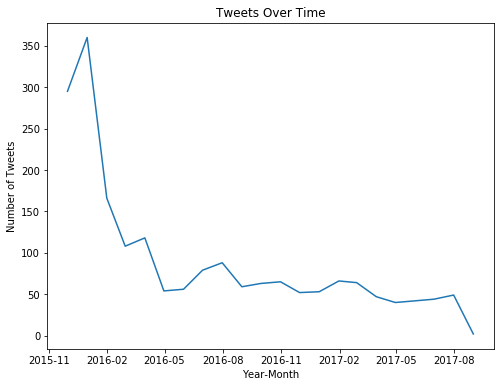

In [100]:
plt.figure(figsize = (8,6))
plt.plot(month_tweets.timestamp, month_tweets.tweet_id)
plt.title('Tweets Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets');

WeRateDogs was extremely active in tweeting around January 2016, then there was a sharp decrease in tweets right after. While WeRateDogs continued to tweet in 2016 and 2017, activity generally trended low compard to the earlier days.

**What is the relationship between favorite count and retweet count?**

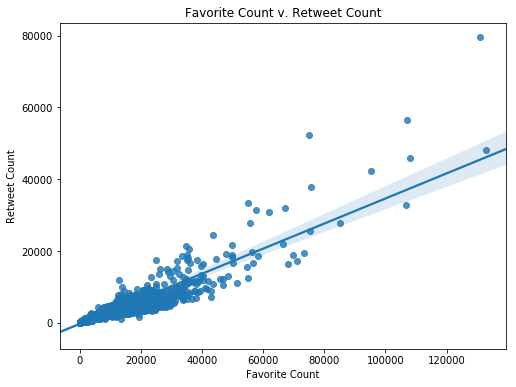

In [101]:
plt.figure(figsize = (8,6))
sns.regplot(x = 'favorite_count', y = 'retweet_count', data = master, fit_reg = True)
plt.title('Favorite Count v. Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

In [102]:
master['favorite_count'].corr(master['retweet_count'])

# master['intercept'] = 1
# lm = sm.OLS(master['retweet_count'], master[['intercept','favorite_count']])
# results = lm.fit()
# results.summary()

0.91301174009379971

There is a strong positive correlation between favorite count and retweet count. This makes sense, as the more a tweet is interacted with, the more it spreads around and even more users interact with it. 

**What is the distribution of ratings for each dog stage?**

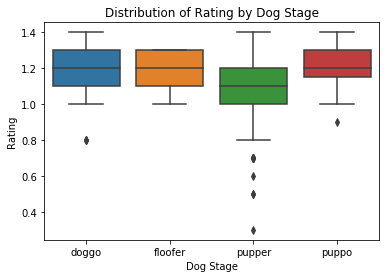

In [103]:
no_none = master[master.dog_stage != "None"]
sns.boxplot(x = 'dog_stage', y = 'rating', data = no_none)
plt.title('Distribution of Rating by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Rating');

In [104]:
no_none.dog_stage.value_counts()

pupper     209
doggo       63
puppo       23
floofer      8
Name: dog_stage, dtype: int64

True to WeRateDogs' unique rating system, most tweets despite dog stage rated at or above 10 out of 10 (hence rating >= 1). Doggo, floofer, and puppo both averaged at 1.2 (12/10), while pupper averaged at 1.1 (11/10). Surprisingly, there were more than a couple puppers that ranked lower than 10/10.

**What is the tweet frequency of popular dog breeds?**

In [105]:
group_breed = master.groupby('dog_breed').count().sort_values('tweet_id', ascending = False).reset_index()
group_breed = group_breed[group_breed.dog_breed != "None"].rename(columns={"tweet_id":"count"})
group_breed = group_breed[['dog_breed', 'count']]

In [106]:
# as the frequency starts tapering after 30, I'm only going to look at the top 13 frequently tweeted dog breeds
top_breed = group_breed[group_breed['count'] >= 30]

In [107]:
top_breed

,dog_breed,count
1,golden_retriever,155
2,labrador_retriever,106
3,pembroke,94
4,chihuahua,90
5,pug,62
6,toy_poodle,50
7,chow,48
8,samoyed,42
9,pomeranian,41
10,malamute,33


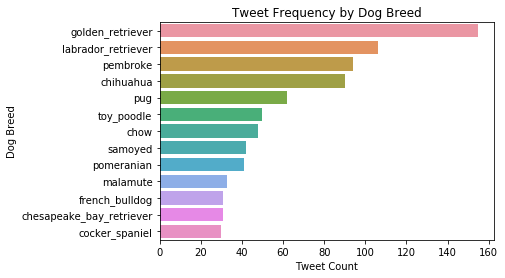

In [108]:
sns.barplot(x = 'count', y = 'dog_breed', data = top_breed)
plt.title('Tweet Frequency by Dog Breed')
plt.xlabel('Tweet Count')
plt.ylabel('Dog Breed');

The most tweeted dog by WeRateDogs was the golden retriever, followed by the labrador retriever with a decently wide margin. 